In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import contextily as cx

In [5]:
import seaborn as sns

In [40]:
df = pd.read_csv('finalV1.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (20,21,22,23,24,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [41]:
df.head()

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
0,SEE922425735582,Solaranlage,In Betrieb,Solare Strahlungsenergie,"9,99","8,2",10/19/2016,2/2/2019,Bayern,92439,...,SEL922220792711,EEG932892356777,NaN,10/19/2016,"9,99",NaN,NaN,NaN,NaN,NaN
1,SEE913667551542,PV-Anlage,In Betrieb,Solare Strahlungsenergie,"6,12",6,7/11/2016,1/31/2019,Baden-Württemberg,88368,...,SEL961238445707,EEG959469675345,E10843010000000000000087353900001,7/11/2016,"6,12",NaN,NaN,NaN,NaN,NaN
2,SEE962350176159,Hausdach,In Betrieb,Solare Strahlungsenergie,"4,16",3,7/19/2016,1/31/2019,Baden-Württemberg,77743,...,SEL995119103929,EEG951922168470,E11904010292008219006000S00100001,7/19/2016,"4,16",NaN,NaN,NaN,NaN,NaN
3,SEE983966266850,MRKDach,In Betrieb,Solare Strahlungsenergie,"15,08",15,8/5/2016,2/9/2019,Baden-Württemberg,75378,...,SEL966967654833,EEG904474851208,E10843010000000000000087766600001,8/5/2016,"15,08",NaN,NaN,NaN,NaN,NaN
4,SEE914434267031,Stromspeicher,In Betrieb,Speicher,2,2,4/13/2016,2/9/2019,Bayern,91629,...,SEL985610916852,EEG985648910952,NaN,4/13/2016,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['MaStR-Nr. der Einheit', 'Anzeige-Name der Einheit', 'Betriebs-Status',
       'Energieträger', 'Bruttoleistung der Einheit',
       'Nettonennleistung der Einheit', 'Inbetriebnahmedatum der Einheit',
       'Registrierungsdatum der Einheit', 'Bundesland', 'Postleitzahl', 'Ort',
       'Straße', 'Hausnummer', 'Gemarkung', 'Flurstück', 'Gemeindeschlüssel',
       'Koordinate: Breitengrad (WGS84)', 'Koordinate: Längengrad (WGS84)',
       'Anzahl der Solar-Module', 'Hauptausrichtung der Solar-Module',
       'Name des Windparks', 'Nabenhöhe der Windenergieanlage',
       'Rotordurchmesser der Windenergieanlage',
       'Hersteller der Windenergieanlage', 'Typenbezeichnung',
       'Hauptbrennstoff der Einheit', 'Nutzbare Speicherkapazität in kWh',
       'Technologie der Stromerzeugung', 'Lage der Einheit',
       'Letzte Aktualisierung', 'Datum der endgültigen Stilllegung',
       'Datum der geplanten Inbetriebnahme',
       'Name des Anlagenbetreibers (nur Org.)',
       '\tMaSt

In [46]:
def convert_column_data_type(dataframe, column_type, column_names=[]):
    for column in column_names: 
        dataframe[column] = dataframe[column].str.replace(',','.').astype(column_type)
    return dataframe

In [47]:
def get_columns_from_df(dataframe, column_names=[]):
    return dataframe[column_names]

In [48]:
columns_to_convert = ["Bruttoleistung der Einheit", "Nettonennleistung der Einheit"]
df = convert_column_data_type(df, "float", columns_to_convert)

In [49]:
df_Baden= df[df['Bundesland']=='Baden-Württemberg']

In [43]:
df_Baden.shape

(329011, 50)

In [34]:
df.shape

(799137, 50)

In [44]:
df_Baden.head()

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
1,SEE913667551542,PV-Anlage,In Betrieb,Solare Strahlungsenergie,"6,12",6,7/11/2016,1/31/2019,Baden-Württemberg,88368,...,SEL961238445707,EEG959469675345,E10843010000000000000087353900001,7/11/2016,"6,12",NaN,NaN,NaN,NaN,NaN
2,SEE962350176159,Hausdach,In Betrieb,Solare Strahlungsenergie,"4,16",3,7/19/2016,1/31/2019,Baden-Württemberg,77743,...,SEL995119103929,EEG951922168470,E11904010292008219006000S00100001,7/19/2016,"4,16",NaN,NaN,NaN,NaN,NaN
3,SEE983966266850,MRKDach,In Betrieb,Solare Strahlungsenergie,"15,08",15,8/5/2016,2/9/2019,Baden-Württemberg,75378,...,SEL966967654833,EEG904474851208,E10843010000000000000087766600001,8/5/2016,"15,08",NaN,NaN,NaN,NaN,NaN
6,SEE945932146603,PV-Anlage,In Betrieb,Solare Strahlungsenergie,"8,4","8,2",4/29/2016,2/1/2019,Baden-Württemberg,74238,...,SEL978051880967,EEG976776380601,E10843010000000000000086852300001,4/29/2016,"8,4",NaN,NaN,NaN,NaN,NaN
9,SEE952049418868,Portobello 1,In Betrieb,Solare Strahlungsenergie,"5,6","5,6",6/24/2016,1/31/2019,Baden-Württemberg,88079,...,SEL963231935995,EEG903461549630,E1327101000EE000033881901RA000000,6/24/2016,"5,6",NaN,NaN,NaN,NaN,NaN


### Netto & Brutto- Ort (Baden & Bayern)

In [50]:
sum_netpower_for_each_ort = df.groupby(["Ort"])["Nettonennleistung der Einheit"].sum().reset_index()
sum_netpower_for_each_ort2=sum_netpower_for_each_ort.sort_values(by=["Nettonennleistung der Einheit"], ascending=False)
sum_netpower_for_each_ort2

,Ort,Nettonennleistung der Einheit
1310,Karlsruhe,969263.792
1594,Mannheim,939523.562
1759,München,278429.071
1066,Heidenheim,227362.792
2576,Stuttgart,181339.926
...,...,...
2710,Unterdielbach,4.410
2315,Sattlthambach,3.990
3056,ehingen,2.400
1375,Klingenmühlhöfle,2.010


In [59]:
sum_netpower_for_each_ort3=sum_netpower_for_each_ort2.head(10)

/tmp/ipykernel_8041/3215081378.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ort', y='Nettonennleistung der Einheit', data=sum_netpower_for_each_ort3, ci=None, estimator=sum)


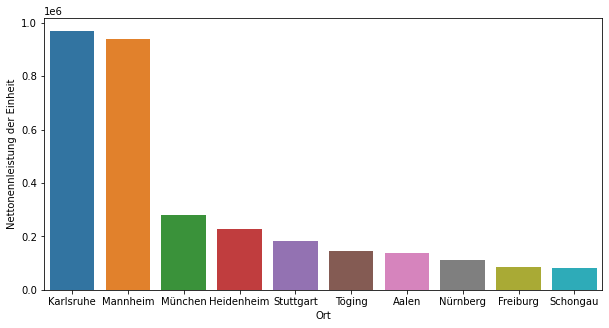

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x='Ort', y='Nettonennleistung der Einheit', data=sum_netpower_for_each_ort3, ci=None, estimator=sum)
plt.show()

In [66]:
sum_bruttopower_for_each_ort = df.groupby(["Ort"])["Bruttoleistung der Einheit"].sum().reset_index()
sum_bruttopower_for_each_ort2=sum_bruttopower_for_each_ort.sort_values(by=["Bruttoleistung der Einheit"], ascending=False)
sum_bruttopower_for_each_ort2

,Ort,Bruttoleistung der Einheit
1310,Karlsruhe,1059094.779
1594,Mannheim,1023742.103
1759,München,329536.371
1066,Heidenheim,228759.738
2576,Stuttgart,190020.421
...,...,...
1070,Heiligenbruck,4.550
3056,ehingen,4.000
2315,Sattlthambach,3.990
1375,Klingenmühlhöfle,2.550


In [67]:
sum_bruttopower_for_each_ort3=sum_bruttopower_for_each_ort2.head(10)

/tmp/ipykernel_8041/3052646941.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ort', y='Bruttoleistung der Einheit', data=sum_bruttopower_for_each_ort3, ci=None, estimator=sum)


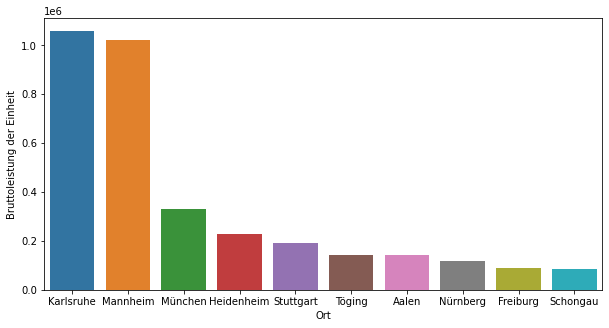

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(x='Ort', y='Bruttoleistung der Einheit', data=sum_bruttopower_for_each_ort3, ci=None, estimator=sum)
plt.show()

### Netto & Brutto-ort (Baden)

In [70]:
sum_netpower_for_each_ort_Baden = df_Baden.groupby(["Ort"])["Nettonennleistung der Einheit"].sum().reset_index()
sum_netpower_for_each_ort_Baden2=sum_netpower_for_each_ort_Baden.sort_values(by=["Nettonennleistung der Einheit"], ascending=False)
sum_netpower_for_each_ort_Baden2

,Ort,Nettonennleistung der Einheit
512,Karlsruhe,969263.792
616,Mannheim,939523.562
416,Heidenheim,222031.937
947,Stuttgart,181339.926
1,Aalen,137291.646
...,...,...
419,Heiligenbruck,4.500
987,Unterdielbach,4.410
1106,ehingen,2.400
529,Klingenmühlhöfle,2.010


In [71]:
sum_netpower_for_each_ort_Baden3=sum_netpower_for_each_ort_Baden2.head(10)

/tmp/ipykernel_8041/294269182.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ort', y='Nettonennleistung der Einheit', data=sum_netpower_for_each_ort_Baden3, ci=None, estimator=sum)


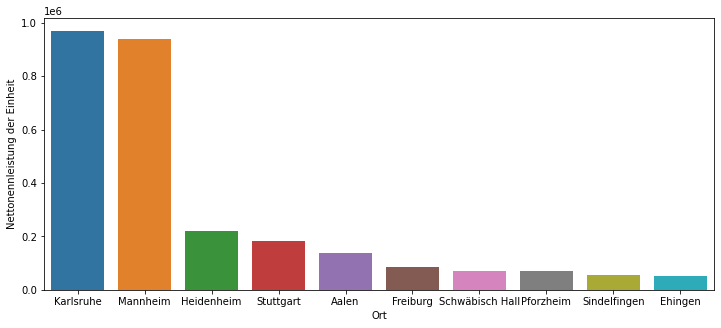

In [75]:
plt.figure(figsize=(12,5))
sns.barplot(x='Ort', y='Nettonennleistung der Einheit', data=sum_netpower_for_each_ort_Baden3, ci=None, estimator=sum)
plt.show()

In [76]:
sum_bruttopower_for_each_ort_Baden = df.groupby(["Ort"])["Bruttoleistung der Einheit"].sum().reset_index()
sum_bruttopower_for_each_ort_Baden2=sum_bruttopower_for_each_ort_Baden.sort_values(by=["Bruttoleistung der Einheit"], ascending=False)
sum_bruttopower_for_each_ort_Baden2

,Ort,Bruttoleistung der Einheit
1310,Karlsruhe,1059094.779
1594,Mannheim,1023742.103
1759,München,329536.371
1066,Heidenheim,228759.738
2576,Stuttgart,190020.421
...,...,...
1070,Heiligenbruck,4.550
3056,ehingen,4.000
2315,Sattlthambach,3.990
1375,Klingenmühlhöfle,2.550


In [77]:
sum_bruttopower_for_each_ort_Baden3=sum_bruttopower_for_each_ort_Baden2.head(10)

/tmp/ipykernel_8041/3161801571.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ort', y='Bruttoleistung der Einheit', data=sum_bruttopower_for_each_ort_Baden3, ci=None, estimator=sum)


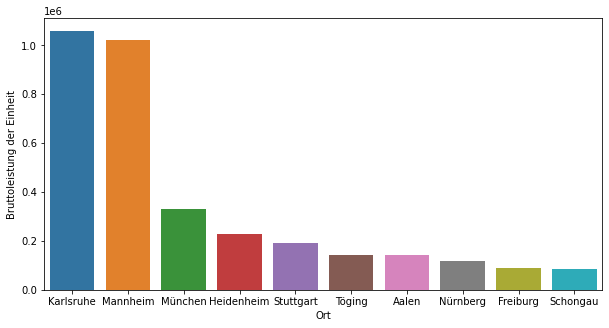

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x='Ort', y='Bruttoleistung der Einheit', data=sum_bruttopower_for_each_ort_Baden3, ci=None, estimator=sum)
plt.show()

### powersource-Netto (Baden & Bayern)

In [79]:
sum_power_for_each_energy = df.groupby(["Energieträger"])["Nettonennleistung der Einheit"].sum().reset_index()
sum_power_for_each_energy2=sum_power_for_each_energy.sort_values(by=["Nettonennleistung der Einheit"], ascending=False)
sum_power_for_each_energy2

,Energieträger,Nettonennleistung der Einheit
8,Solare Strahlungsenergie,1.224931e+07
13,Wind,3.047126e+06
3,Erdgas,1.989578e+06
11,Steinkohle,1.677000e+06
10,Speicher,1.245932e+06
0,Biomasse,1.139960e+06
7,Mineralölprodukte,4.339885e+05
12,Wasser,2.591419e+05
15,andere Gase,6.847629e+04
14,Wärme,5.841721e+04


In [80]:
sum_power_for_each_energy3=sum_power_for_each_energy2.head(10)

/tmp/ipykernel_8041/612073706.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Energieträger', y='Nettonennleistung der Einheit', data=sum_power_for_each_energy3, ci=None, estimator=sum)


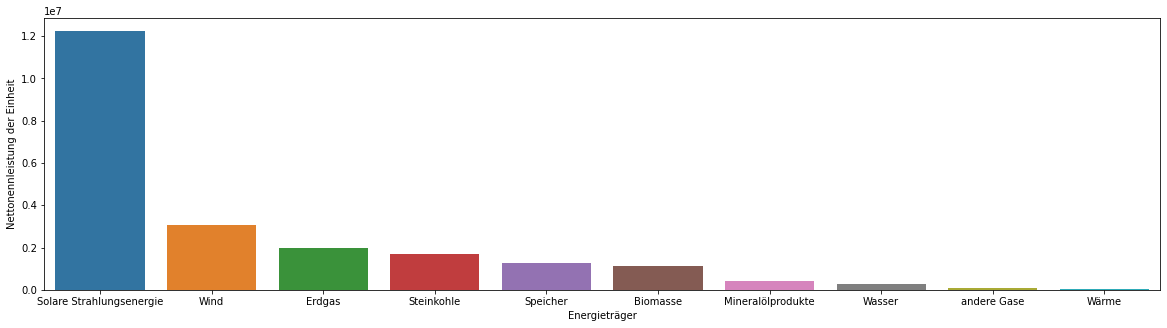

In [82]:
plt.figure(figsize=(20,5))
sns.barplot(x='Energieträger', y='Nettonennleistung der Einheit', data=sum_power_for_each_energy3, ci=None, estimator=sum)
plt.show()

### powersource-Netto (Baden)

In [83]:
sum_power_for_each_energy_Baden = df_Baden.groupby(["Energieträger"])["Nettonennleistung der Einheit"].sum().reset_index()
sum_power_for_each_energy_Baden2=sum_power_for_each_energy_Baden.sort_values(by=["Nettonennleistung der Einheit"], ascending=False)
sum_power_for_each_energy_Baden2

,Energieträger,Nettonennleistung der Einheit
8,Solare Strahlungsenergie,3.699597e+06
11,Steinkohle,1.677000e+06
13,Wind,1.242119e+06
3,Erdgas,9.068282e+05
10,Speicher,4.582786e+05
0,Biomasse,3.165835e+05
7,Mineralölprodukte,2.677710e+05
12,Wasser,6.328267e+04
14,Wärme,5.482348e+04
15,andere Gase,2.796021e+04


In [84]:
sum_power_for_each_energy_Baden3=sum_power_for_each_energy_Baden2.head(10)

/tmp/ipykernel_8041/2826055540.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Energieträger', y='Nettonennleistung der Einheit', data=sum_power_for_each_energy_Baden3, ci=None, estimator=sum)


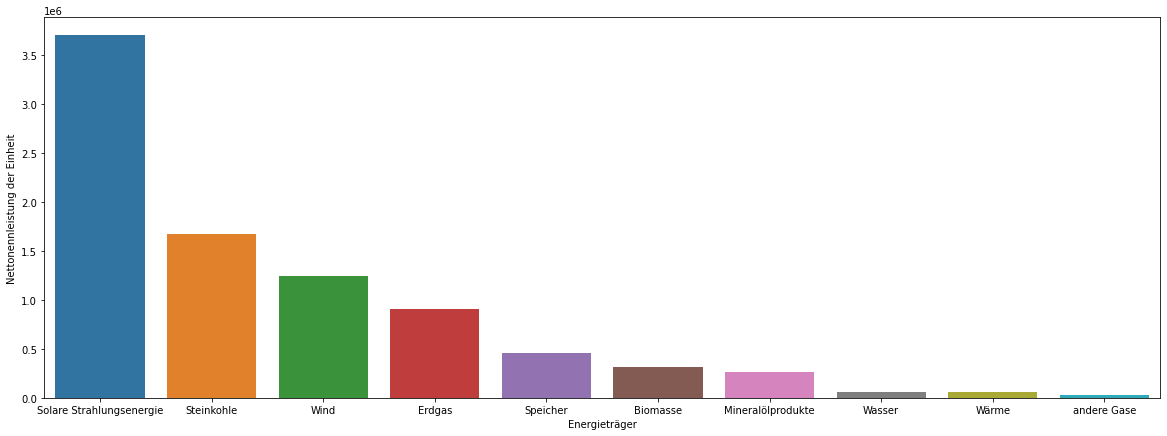

In [86]:
plt.figure(figsize=(20,7))
sns.barplot(x='Energieträger', y='Nettonennleistung der Einheit', data=sum_power_for_each_energy_Baden3, ci=None, estimator=sum)
plt.show()

<AxesSubplot:ylabel='Betriebs-Status'>

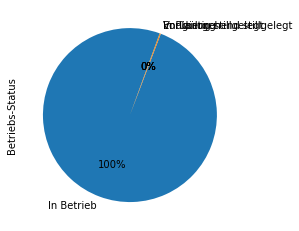

In [88]:
df["Betriebs-Status"].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=70)

<AxesSubplot:>

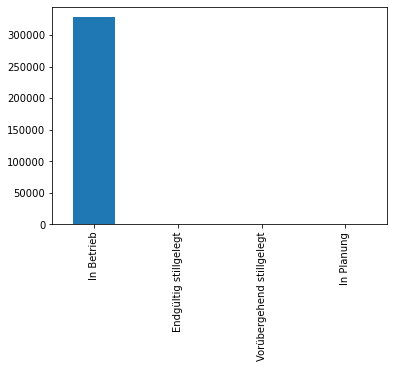

In [90]:
df_Baden["Betriebs-Status"].value_counts().plot(kind='bar')

In [92]:
df["Betriebs-Status"].unique()

array(['In Betrieb', 'Endgültig stillgelegt', 'Vorübergehend stillgelegt',
       'In Planung'], dtype=object)

In [93]:
df['Lage der Einheit'].unique()

array(['Bauliche Anlagen (Hausdach, Gebäude und Fassade)', nan,
       'Windkraft an Land', 'Bauliche Anlagen (Sonstige)', 'Freifläche',
       'Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage)'],
      dtype=object)

In [102]:
df_Freifläche=df[df['Lage der Einheit']=='Freifläche']

In [96]:
df_Freifläche.shape

(2754, 50)

In [108]:
df_Solare=df_Freifläche[df_Freifläche['Energieträger']=='Solare Strahlungsenergie']

In [109]:
df_Solare.head()

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
659,SEE930947702111,PV Freibad Ehingen,In Betrieb,Solare Strahlungsenergie,40.56,40.0,7/7/2016,2/25/2019,Baden-Württemberg,89584,...,SEL906076820743,EEG978465477791,E108490105E0000000000000071100001,7/7/2016,"40,56",NaN,NaN,NaN,NaN,NaN
692,SEE927388494125,9007 Solarpark Rickelshausen BA VI,In Betrieb,Solare Strahlungsenergie,2636.95,2400.0,5/31/2016,2/15/2019,Baden-Württemberg,78224,...,SEL946731324988,EEG991676277172,E10883010831573598000000000000613,5/31/2016,"2636,95",NaN,NaN,NaN,NaN,NaN
1723,SEE998263299272,ValBR,In Betrieb,Solare Strahlungsenergie,1497.60,1380.0,8/8/2016,3/27/2019,Bayern,96476,...,SEL922723062670,EEG982010703075,E21762010005479647601000000100325,8/8/2016,"1497,6",NaN,NaN,NaN,NaN,NaN
2376,SEE939468604218,PI Riedhöfe 1 FF,In Betrieb,Solare Strahlungsenergie,95.16,90.0,10/31/2016,5/7/2019,Baden-Württemberg,77694,...,SEL987469303029,EEG958291400330,E11904010516022680003000S00000003,10/31/2016,"95,16",NaN,NaN,NaN,NaN,NaN
2435,SEE970015820255,PVA Gattendorf 2,In Betrieb,Solare Strahlungsenergie,3758.00,3630.0,7/14/2016,5/11/2019,Bayern,95185,...,SEL986931157221,EEG910243035779,E20241012013120131191100000000003,7/14/2016,3758,"FFA15-2/101,",NaN,NaN,NaN,NaN
